In [ ]:
# histogram : 계급별로 나눠서 갯수를 확인
# bins가 하는 역할 : 구간을 나누는 기준을 설정
# 연속형 데이터를 범주형 데이터로 분류할 수 있음 / 새로운 피처를 생성 ==> 피처 엔지니어링
# 피처 엔지니어링 하는 이유 : 
    #데이터분석 또는 학습을 할 때 다양한 데이터 특성을 찾아서 추가


In [3]:
import pandas as pd
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()
#출력 해석
#상기 head에서 3에는 숫자로 보이나, 
# # Column   Non-Null Count     Dtype 
# 3   3      398 non-null       object 
# 이렇게 출력된것 보니 결측치는 아니고, 숫자가 아닌 무엇이 들어있다! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df[3][0], df[2][1]
# 출력 해석 ('130.0', np.float64(350.0))
# 숫자가 object로 됨

('130.0', np.float64(350.0))

In [21]:
'123'.isnumeric()
'12aa3'.isnumeric()

False

In [ ]:
for idx, data in enumerate(df[3]):
    try:
        float(data.strip())
    except Exception as e:
        print(df[3][idx])
        print(e)

?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'


In [25]:
df[3]=df[3].replace('?', pd.NA)

In [27]:
df[3].replace('?', pd.NA).isna().sum()

np.int64(6)

In [ ]:
df.info()
# # Column   Non-Null Count     Dtype 
# 3   3      392 non-null       object 
# ?가 NA로 처리되면서 398에서 392로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       392 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<Axes: >

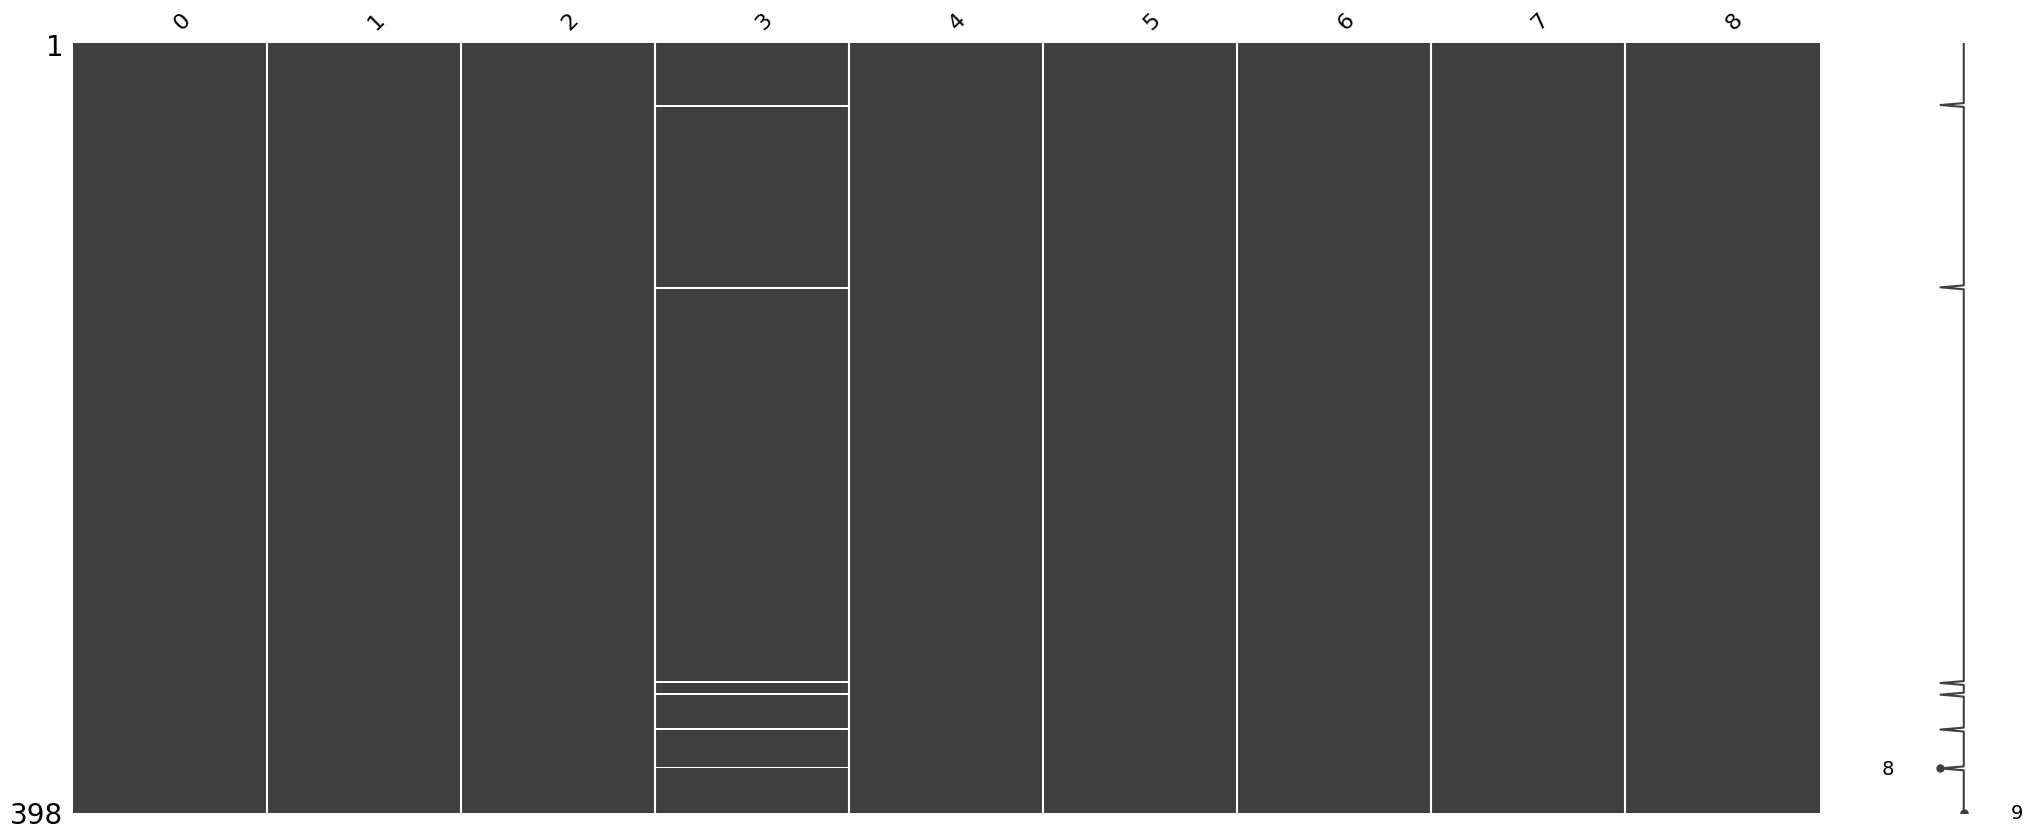

In [29]:
import missingno as msno
msno.matrix(df)

<Axes: >

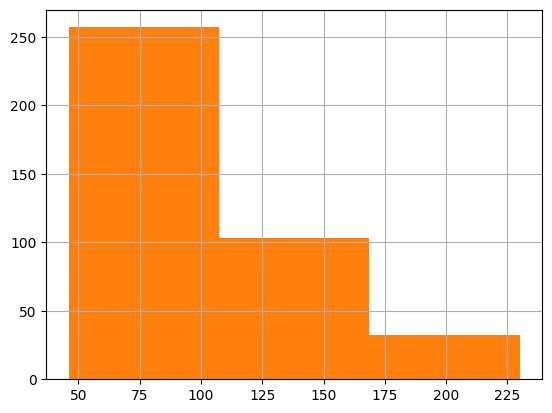

In [ ]:
#결측치 제거
df=df.dropna()  #상기 컬럼3에만 na에가 있으므로 전체 drop()해도 괜춘. 그런거 아니면 유의할 것
df[3].hist()
df[3]=df[3].astype('float')   
df[3].hist(bins=3)  # bins가 하는 역할 : 구간을 나누는 기준을 설정


In [48]:
#구간을 직접 지정할 때 pd.cut
    #Domain 지식이 있을 때 (ex. 3개로 쪼개면 되겠다 라는 뒷받침하는 증거가 있을때?)
#마력 low/medium/hight
import numpy as np
cnt,bins = np.histogram(df[3],bins=3)
print(cnt,bins)
#출력 해석
#[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]
# 46 / 107.3 / 168.6 / 230 으로 나뉘어짐
# cnt는 46~107.3 값을 가지는 갯수가 257개
# 107.3 ~ 168.6 값을 가지는 갯수가 103개
# 168.6 ~ 230 값을 가지는 갯수가 32개
labels = ['low', 'medium', 'hight']
df['power']=pd.cut(df[3],
        bins = bins,
        labels = labels       
       )
df.head()

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


,0,1,2,3,4,5,6,7,8,출력,출력q,qpower,power
0,18.0,8,95.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통,고출력,hight,medium
1,15.0,8,95.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통,고출력,hight,medium
2,18.0,8,95.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통,고출력,hight,medium
3,16.0,8,95.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통,고출력,hight,medium
4,17.0,8,95.0,140.0,3449.0,10.5,70,1,ford torino,보통,고출력,hight,medium


In [47]:
# pd.qcut : 분위수기반으로 동일한 개수로 분할
# 각 구간별 샘플개수가 비슷
# 구간폭이 일정하지 않음
labels = ['low', 'medium', 'hight']
df['qpower']=pd.qcut(df[3], q=3, labels=labels)
df.head()

,0,1,2,3,4,5,6,7,8,출력,출력q,qpower
0,18.0,8,95.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통,고출력,hight
1,15.0,8,95.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통,고출력,hight
2,18.0,8,95.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통,고출력,hight
3,16.0,8,95.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통,고출력,hight
4,17.0,8,95.0,140.0,3449.0,10.5,70,1,ford torino,보통,고출력,hight


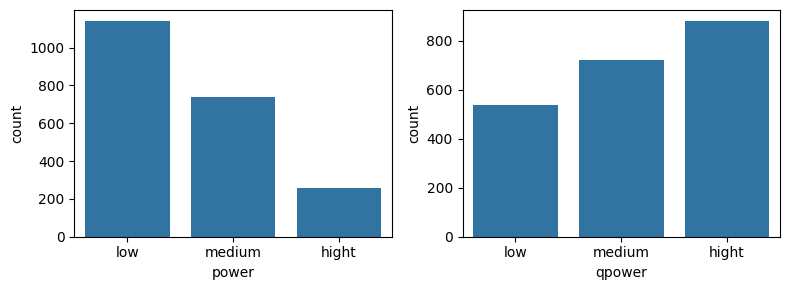

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2, figsize=(8,3))
sns.countplot(data=df, x='power', ax=ax[0])
sns.countplot(data=df, x='qpower', ax=ax[1])
plt.tight_layout()
plt.show()


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers) 

[ 46.         107.33333333 168.66666667 230.        ]


In [2]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력
